In [1]:
import folium

print(folium.__file__)
print(folium.__version__)

/home/filipe/.virtualenvs/iris/lib/python2.7/site-packages/folium/__init__.py
0.1.6


In [2]:
import matplotlib.pyplot as plt


fname = ("https://raw.githubusercontent.com/ocefpaf/"
         "python4oceanographers/master/content/downloads/"
         "notebooks/data/itaguare_cropped.jpg")

min_lon = -(45 + (58 + 32.27/60) / 60)  # 45°58'32.27"W
max_lon = -(45 + (57 + 54.54/60) / 60)  # 45°57'54.54"W
min_lat = -(23 + (47 +  7.65/60) / 60)  # 23°47' 7.65"S
max_lat = -(23 + (46 + 42.25/60) / 60)  # 23°46'42.25"S

kw = dict(width=650, height=500,
          min_lon=min_lon, max_lon=max_lon,
          min_lat=min_lat, max_lat=max_lat,
          zoom_start=15)


mapa = folium.Map(location=[-47.563861111111109, -91.940780555555563],
                  tiles='Stamen Toner', **kw)
mapa.image_overlay(fname, min_lat=min_lat, max_lat=max_lat,
                   min_lon=min_lon, max_lon=max_lon, opacity=1)

mapa


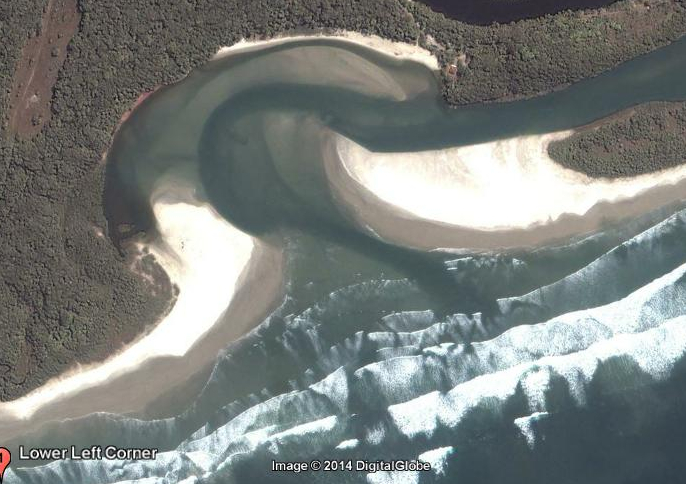

In [3]:
data = plt.imread('data/itaguare_cropped.jpg')

mapa = folium.Map(location=[-47.563861111111109, -91.940780555555563],
                  tiles='Stamen Toner', **kw)
mapa.image_overlay(data, min_lat=min_lat, max_lat=max_lat,
                   min_lon=min_lon, max_lon=max_lon, opacity=1,
                   data_projection=None)

mapa

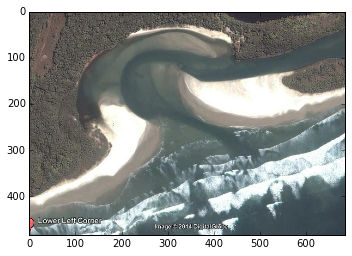

In [4]:
%matplotlib inline

plt.imshow(data)

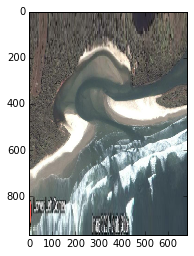

In [5]:
from folium.utilities import geodetic_to_mercator

data2 = geodetic_to_mercator(data)
plt.imshow(data2)

In [6]:
data.shape, data2.shape

((484, 686, 3), (968, 686, 3))


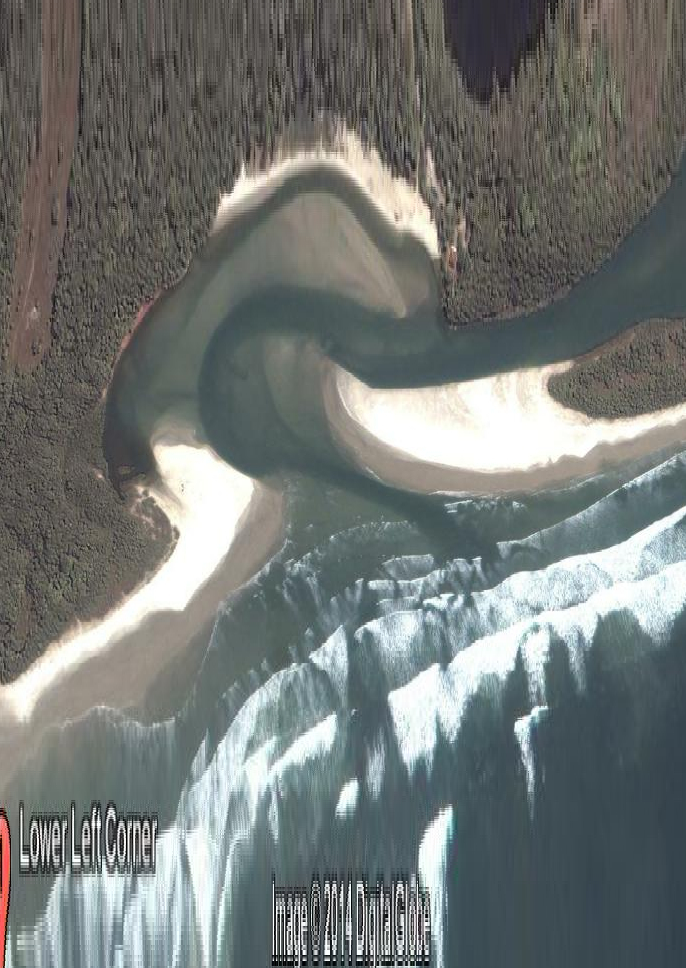

In [7]:
import base64
from IPython.display import display, HTML
from folium.utilities import write_png

png_str = write_png(data2)

png = "data:image/png;base64,{}".format(base64.b64encode(png_str))

display(HTML('<img src="%s"/>' % png))